In [1]:
import os
import numpy as np

In [2]:
# 载入数据
from numpy import genfromtxt
train_dataset = genfromtxt('data/train.csv',delimiter=',')
val_dataset = genfromtxt('data/val.csv',delimiter=',')
test_data = genfromtxt('data/test_data.csv',delimiter=',')
train_data = train_dataset[1:,:4]
train_label = train_dataset[1:,4]
val_data = val_dataset[1:,:4]
val_label = val_dataset[1:,4]
test_data = test_data[1:,:]

In [3]:
# 验证函数
from collections import Counter
def verify_kNN(train_data, test_data, k):
    predict = np.zeros(len(test_data[:,0]))
    for i in range(len(predict)):
        d = np.zeros(len(train_data[:,0]))
        for j in range(len(d)):
            d[j] = np.linalg.norm(test_data[i,:] - train_data[j,:])
            idx = np.argsort(d)[:k]
            predict[i] = Counter(train_label[idx]).most_common(1)[0][0]    
    return predict

In [4]:
# 测试集预测
predict = verify_kNN(train_data, test_data, 5)
print(predict)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.]


In [5]:
# 记录测试结果
import csv
with open("task1_test_prediction.csv","w", newline="") as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(["index","label"])
    for i in range(len(predict)):
        writer.writerow([i,int(predict[i])])

[0.93333333 0.93333333 0.93333333 0.93333333 1.         0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         0.93333333 1.         0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.86666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6     

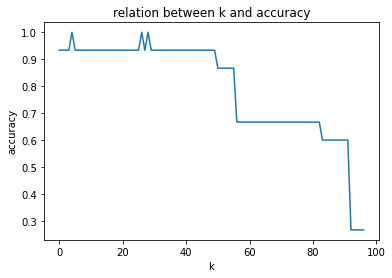

In [6]:
# 在验证集上考察k与精度的关系
import matplotlib.pyplot as plt

acc = np.zeros(97)
for k in range(1, 98):
    predict = verify_kNN(train_data, val_data, k)
    acc[k-1] = np.sum(predict == val_label)/len(predict)
print(acc)
plt.plot(range(0,97), acc)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('relation between k and accuracy')
plt.show()